# <center>$\textbf{Kaggle Challenge: House Prices Dataset}$</center>

# [challenge link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)</center>



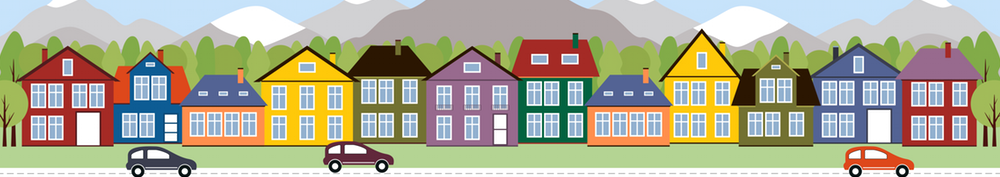

In [1]:
! pip install missingno

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat
import humanize
sns.set_style('darkgrid')

# Load the Dataset

1. Load the $\text{train.csv}$, and $\text{test.csv}$ files from [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
2. Copy the files to your Google Drive
3. To access the files Mount your Google Drive in the runtime's virtual machine

  **Note:** When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user
3. [Create a pandas dataframe](https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58).

Create pandas dataframe code

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

PATH_TO_DATA = '/content/drive/MyDrive/Colab Notebooks/KaggleChallenges/House_Prices/data'
train_df     = pd.read_csv(f'{PATH_TO_DATA}/train.csv')
test_df      = pd.read_csv(f'{PATH_TO_DATA}/test.csv') 

train_df['DataSet'] = 'train'
test_df['DatSet']   = 'test'
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DataSet
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train


# Data Exploration

## Variable Identification
First, identify  Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.

### Target variable

In [5]:
def plot_target_variable_distribution(df, target_varible, log=False):
  if log:
    target = np.log1p(df[target_varible])
  else:
    target = df[target_varible]
  sns.histplot(target,
              kde=True, 
              stat='density', 
              linewidth=0);
  plt.axvline(x=target.median(),
              color='blue',
              ls='--', 
              lw=1.0,
              label='median')
  plt.axvline(x=target.mean(),
              color='green',
              ls='--', 
              lw=1.0,
              label='mean')
  plt.axvline(x=np.median(target.mode() ),
              color='r',
              ls='--', 
              lw=1.0,
              label='mode')
  #skewness and kurtosis
  print(f'Skewness: {target.skew():.2f}')
  print(f'Kurtosis: {target.kurt():.2f}')
  print(f'Mean:     {humanize.intcomma(np.round(target.mean(),   2))}')
  print(f'Median:   {humanize.intcomma(np.round(target.median(), 2))}')
  print(f'Mode:     {humanize.intcomma(np.round(np.median(target.mode()),   2))}') 
  plt.legend();

Skewness: 1.88
Kurtosis: 6.54
Mean:     180,921.2
Median:   163,000.0
Mode:     140,000.0


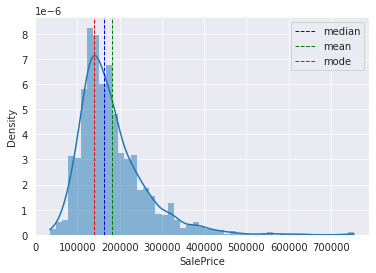

In [6]:
plot_target_variable_distribution(train_df, 'SalePrice')

Skewness: 0.12
Kurtosis: 0.81
Mean:     12.02
Median:   12.0
Mode:     11.85


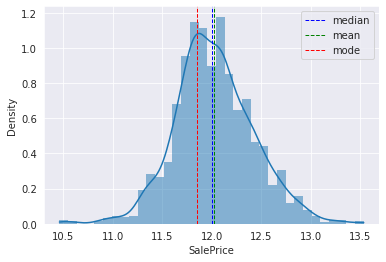

In [7]:
plot_target_variable_distribution(train_df, 'SalePrice', log=True)

In [8]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

## Univariate Analysis
At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

* $\text{Continuous Variables}$: In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics visualization methods.

* $\text{Categorical Variables}$: For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

$\text{Note}:$ Univariate analysis is also used to highlight missing and outlier values.


### Features data types

In [9]:
def plot_datatypes(df):
  type_counts = df.dtypes.value_counts()
  ax          = sns.barplot(x=type_counts.index.astype(str), 
                            y=type_counts.values)

  plt.title('Features data types distribution')
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2., 
              height+0.25, 
              height, 
              ha='center')

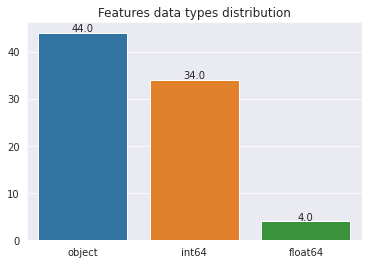

In [10]:
plot_datatypes(train_df)

### Features info

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
### Remove collumns based on number of Nall values
'''
Remove columns that has more then 'drop_limit' nan values

Returns:
nan_df - dataframe contains all the columns that has Nalls and not removed from the original dataframe
df     - original dataframe without the removed columns 
'''
def remove_nr_columns(df, 
                      drop_limit=0.5,
                      inplace=False):
    nan_df = pd.DataFrame(df.isna().sum(), 
                         columns = ['# of NaN'])
    
    nan_df = nan_df.sort_values('# of NaN', 
                              ascending=False).head(10)
    
    nan_df['NaN'] = round(nan_df['# of NaN']/len(df.index), 3)
    
    # Remove columns that have more than 'drop_limit' of NaN
    to_drop = list(nan_df[nan_df['NaN'] > drop_limit].index)
    nan_df['NaN'] = nan_df['NaN'].astype(str)
    df.drop(to_drop, 
            inplace=inplace, 
            axis=1)
    
    print(to_drop, f' columns have been removed (> {drop_limit} NaN)\n', sep = '')
    
    return nan_df, df.astype('float64', errors='ignore')

❗ Skip this step?

In [13]:
# missing_val_train, train_df = remove_nr_columns(train_df, 
#                                                 drop_limit=0.7,
#                                                 inplace=True)

### Drop Id columd

In [14]:
train_df.drop(['Id'],axis=1,inplace=True)
test_ids = test_df['Id']
test_df.drop(['Id'],axis=1,inplace=True)

### Split columns to categorical and continuous

In [15]:
def get_categorical_and_continuous_cols(df, nunique_count):
  num_unique_val = pd.DataFrame(df.nunique(), 
                                columns=['unique_val']).sort_values(by='unique_val')
  categorical_variables = num_unique_val[num_unique_val['unique_val']<=nunique_count].index
  continuous_variables  = num_unique_val[num_unique_val['unique_val']>nunique_count].index
      
  continuous_cols  = df.filter(continuous_variables).columns
  categorical_cols = df.filter(categorical_variables).columns
  print(f'Total number of columns: {len(list(df.columns))}')
  print(f'Continuous columns:{len(continuous_cols)}\nCategorical columns:{len(categorical_cols)}')
  return num_unique_val, continuous_cols, categorical_cols

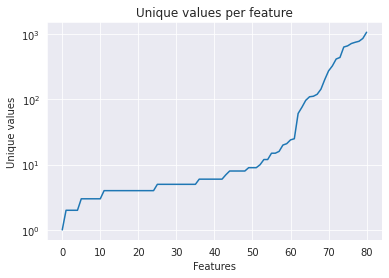

In [16]:
unique_v = train_df.nunique().sort_values()
ax = sns.lineplot(x=range(len(unique_v)), 
             y=unique_v)
ax.set(yscale='log')
ax.set_xlabel('Features')
ax.set_ylabel('Unique values')
ax.set_title('Unique values per feature');

In [17]:
_, continuous_cols, categorical_cols = get_categorical_and_continuous_cols(train_df, 
                                                                        nunique_count=20)

Total number of columns: 81
Continuous columns:22
Categorical columns:59


In [18]:
continuous_cols

Index(['MiscVal', 'LowQualFinSF', 'Neighborhood', 'YearRemodAdd',
       'ScreenPorch', 'GarageYrBlt', 'LotFrontage', 'YearBuilt',
       'EnclosedPorch', 'BsmtFinSF2', 'OpenPorchSF', 'WoodDeckSF',
       'MasVnrArea', '2ndFlrSF', 'GarageArea', 'BsmtFinSF1', 'SalePrice',
       'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea'],
      dtype='object')

#### Continuous variables visualization

In [19]:
def plot_continuous_cols(df, 
                         continuous_cols,
                         figsize=(26, 20)):
  sqrt   = np.sqrt(len(continuous_cols))
  layout = (int(np.ceil(sqrt)), int(np.ceil(sqrt)))
  df[continuous_cols].hist(figsize=figsize, 
                           layout=layout);

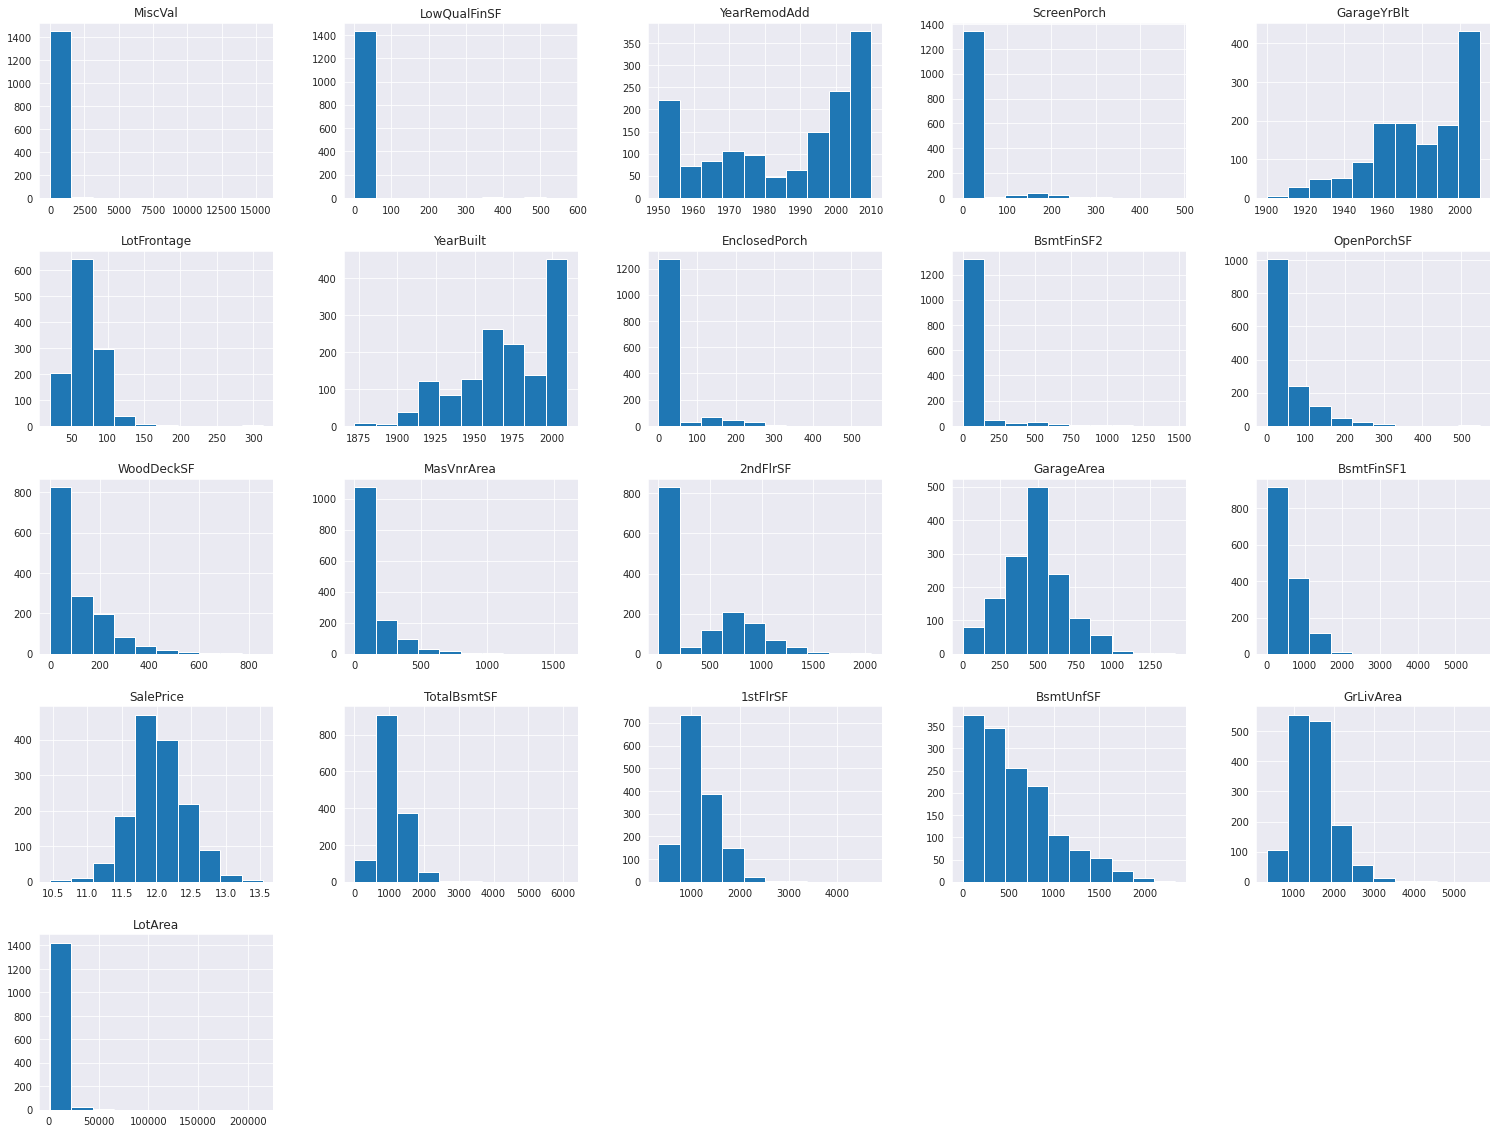

In [20]:
plot_continuous_cols(train_df, continuous_cols)

#### Categorical variables

In [ ]:
def plot_categorical_cols(df, categorical_cols, figsize=(26, 40)):
  sqrt   = np.sqrt(len(categorical_cols))
  fig, ax = plt.subplots(int(np.ceil(sqrt)), 
                         int(np.floor(sqrt)), 
                         figsize=figsize)

  for variable, subplot in zip(categorical_cols, ax.flatten()):
      sns.countplot(x=df[variable],
                    ax=subplot)
      subplot.figure.tight_layout()
      for label in subplot.get_xticklabels():
          label.set_rotation(45)

In [ ]:
categorical_cols

Index(['DataSet', 'Utilities', 'Alley', 'Street', 'CentralAir', 'PavedDrive',
       'LandSlope', 'PoolQC', 'GarageFinish', 'BsmtHalfBath', 'HalfBath',
       'Fence', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'ExterQual',
       'MasVnrType', 'BsmtFullBath', 'KitchenAbvGr', 'FullBath', 'Fireplaces',
       'LotShape', 'LandContour', 'KitchenQual', 'MiscFeature', 'GarageCars',
       'GarageQual', 'ExterCond', 'LotConfig', 'MSZoning', 'FireplaceQu',
       'YrSold', 'GarageCond', 'HeatingQC', 'BldgType', 'Electrical',
       'GarageType', 'Heating', 'BsmtFinType2', 'BsmtFinType1', 'Foundation',
       'RoofStyle', 'SaleCondition', 'Functional', 'PoolArea', 'Condition2',
       'HouseStyle', 'RoofMatl', 'BedroomAbvGr', 'SaleType', 'Condition1',
       'OverallCond', 'OverallQual', 'MoSold', 'TotRmsAbvGrd', 'MSSubClass',
       'Exterior1st', 'Exterior2nd', '3SsnPorch'],
      dtype='object')

#### Categorical variables visualization

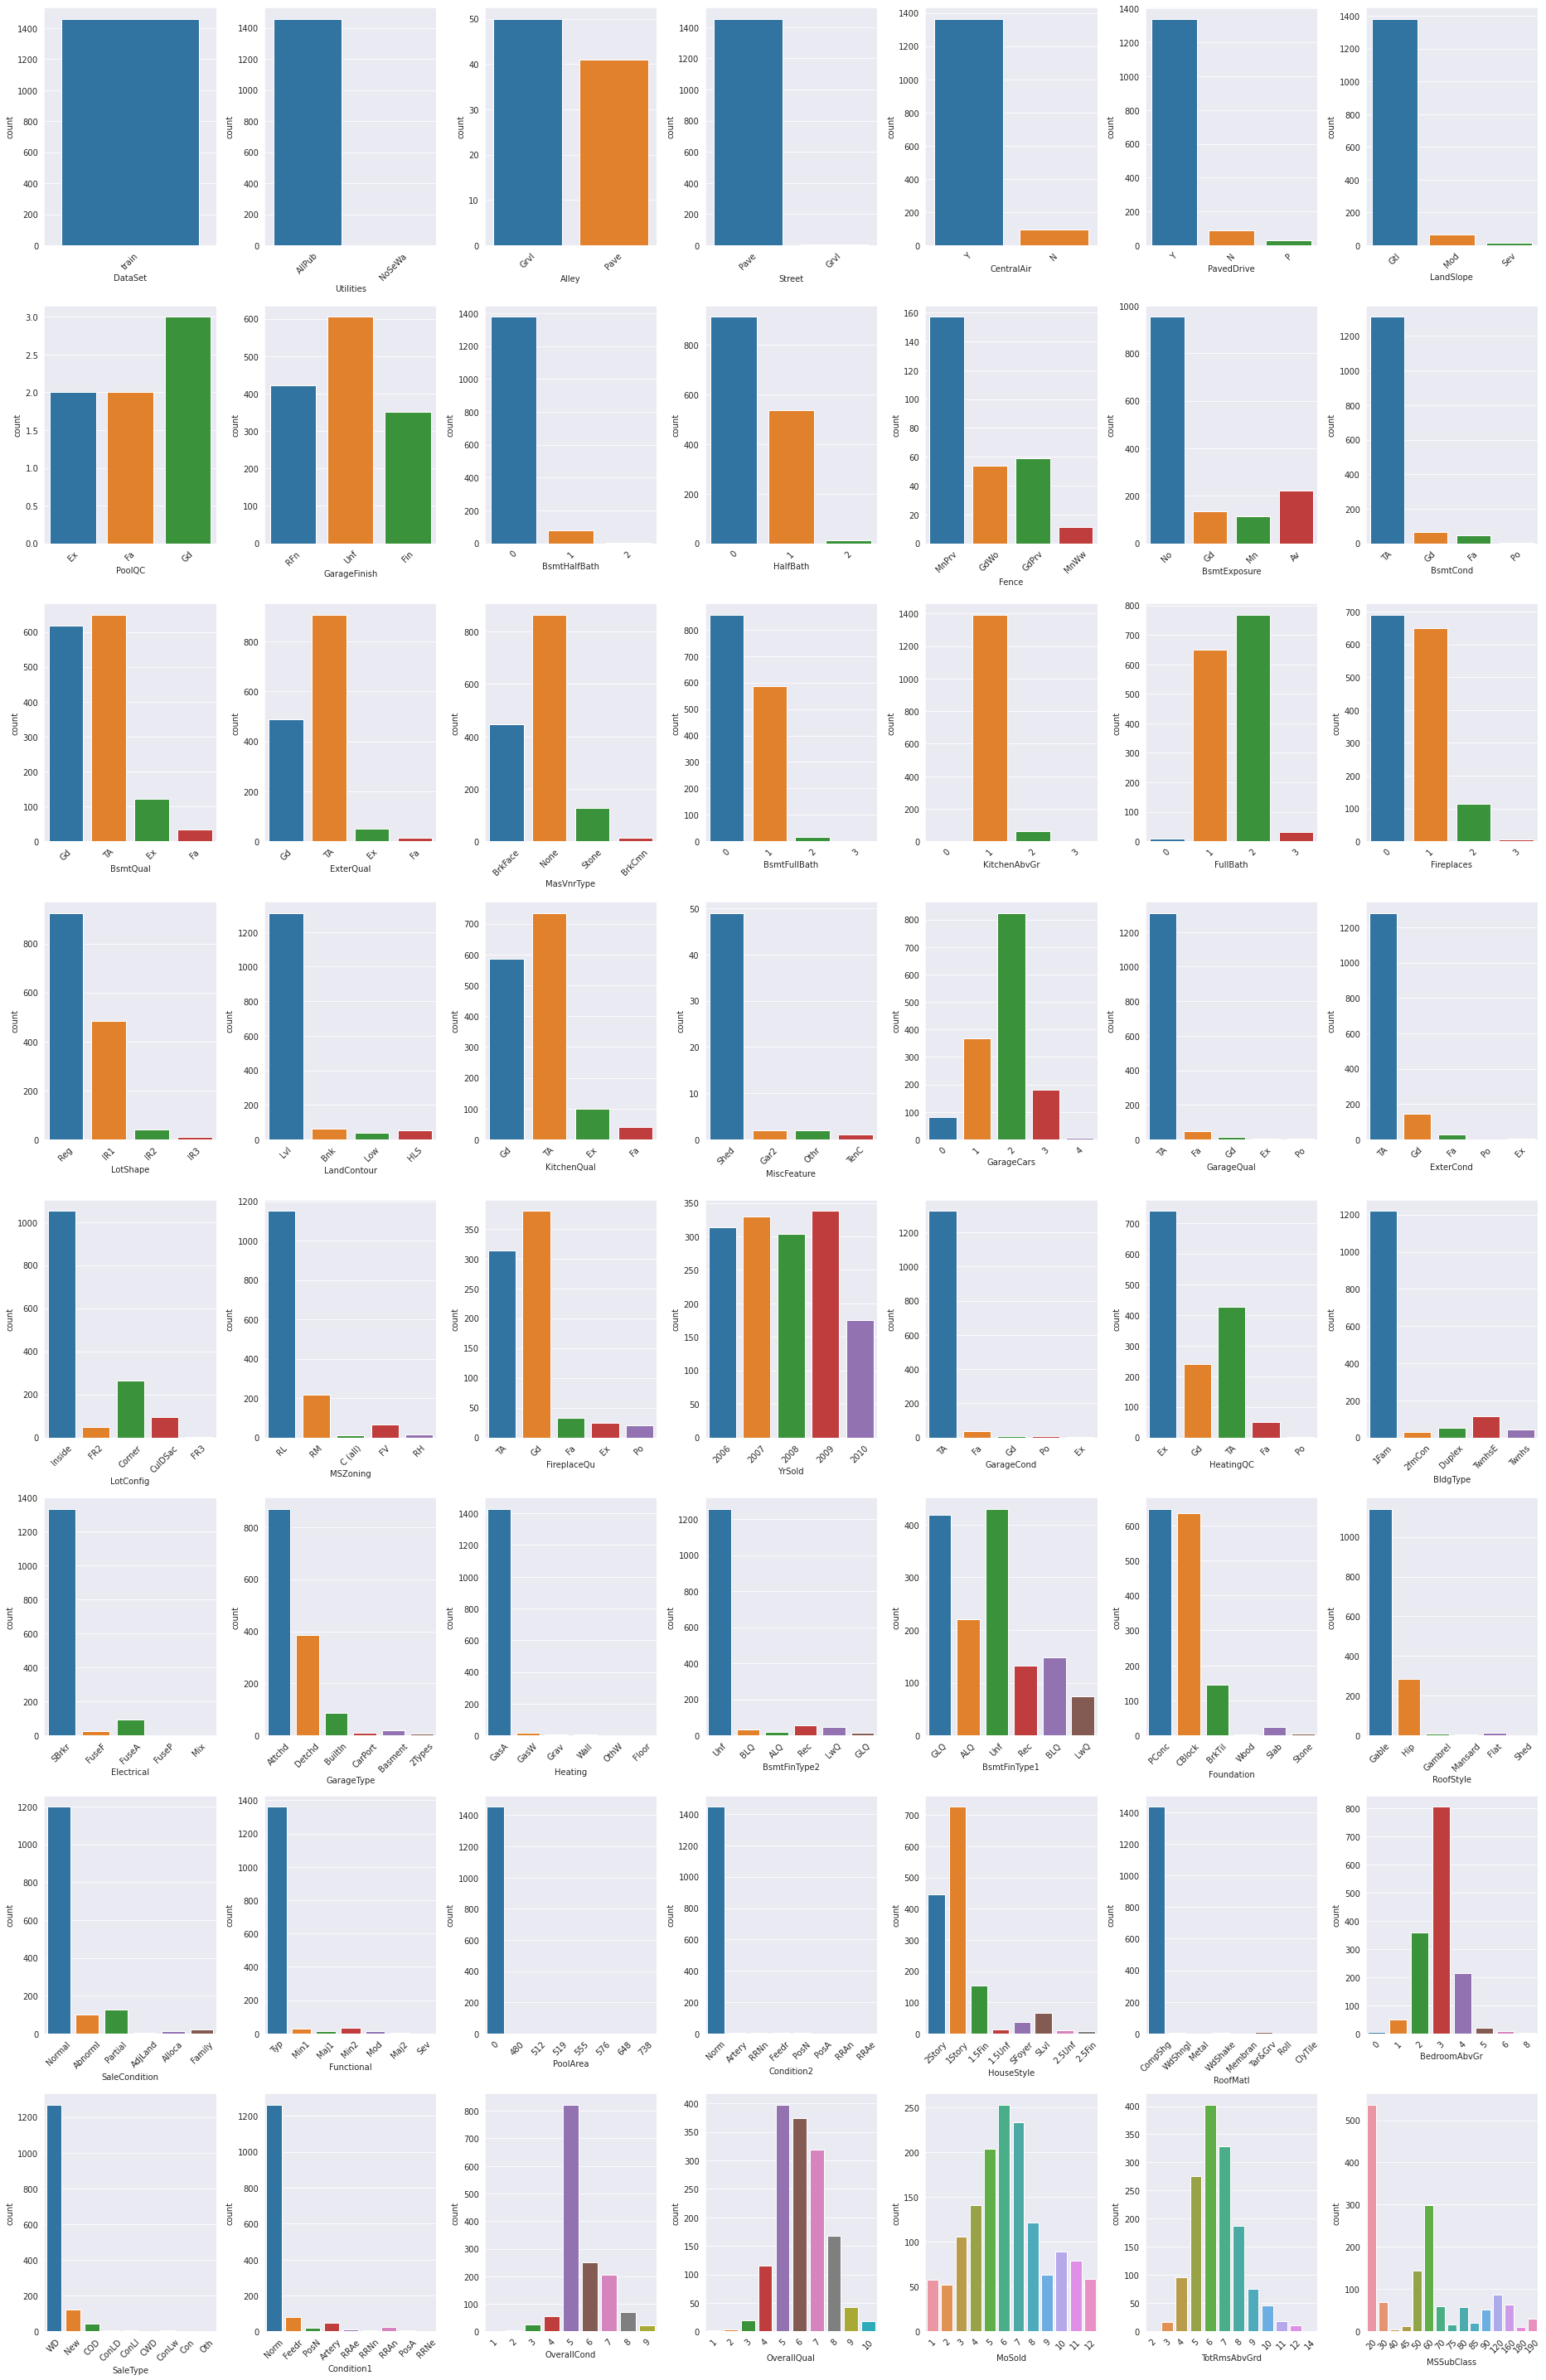

In [ ]:
plot_categorical_cols(train_df, categorical_cols)

## Bi-variate Analysis
Bi-variate Analysis finds out the relationship between two variables. 

### Pearson correlation 

In [ ]:
corr_mat = train_df.corr(method='pearson')

def get_features_max_corr_score(corr_matrix, targer_variable, n=5):
  # Convert correlation matrix to 1-D Series and sort
  sorted_mat = corr_matrix.abs().unstack().sort_values(ascending=False)
    
  res_df = pd.DataFrame(sorted_mat).reset_index()
  res_df.rename(columns={'level_0': 'f_1', 'level_1': 'f_2', 0: 'corr_score'}, inplace=True)
  res_df = res_df[(res_df['f_1']!=res_df['f_2']) & ((res_df['f_1']==targer_variable) | (res_df['f_2']==targer_variable))]
  return set(list(res_df[:n*2]['f_1']) + list(res_df[:n*2]['f_2']) )

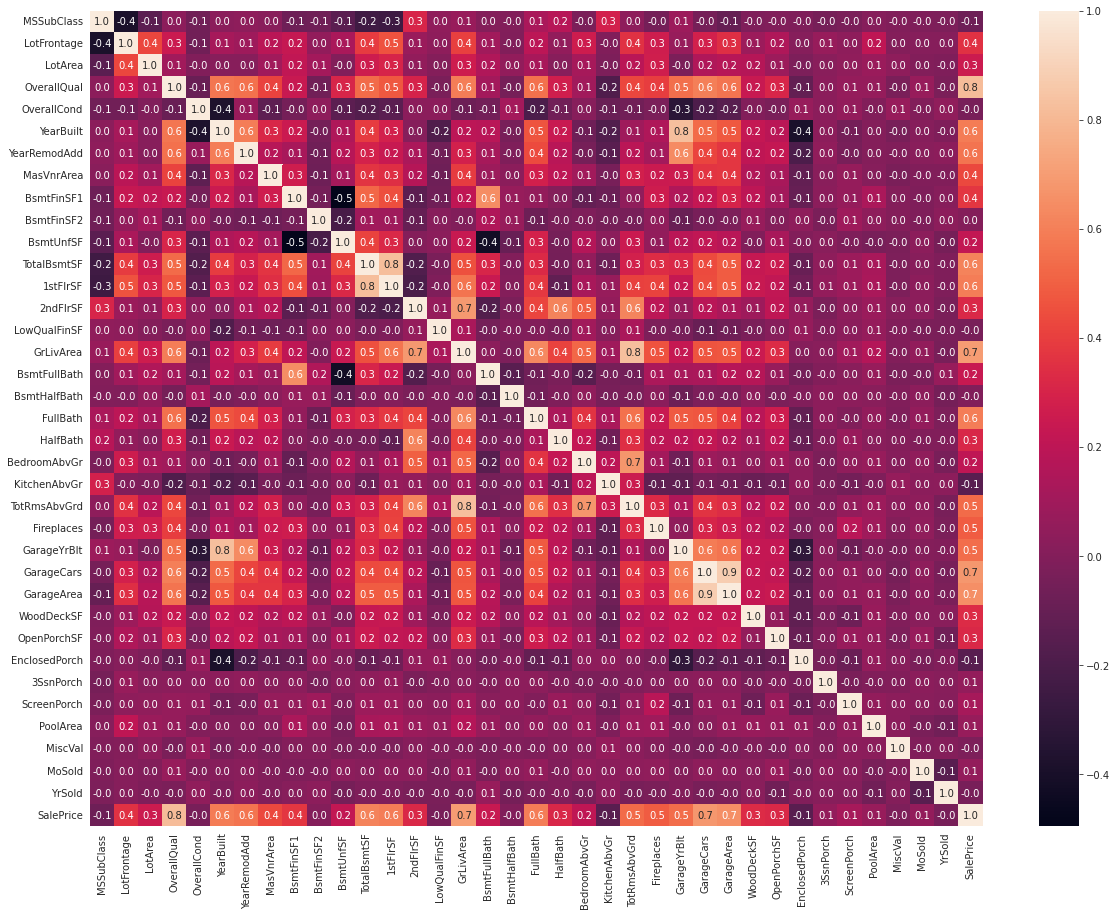

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr_mat, 
            annot=True, 
            annot_kws={'size': 10},
            fmt='.1f',
            ax=ax);

### High correlations feature with 'SalePrice'

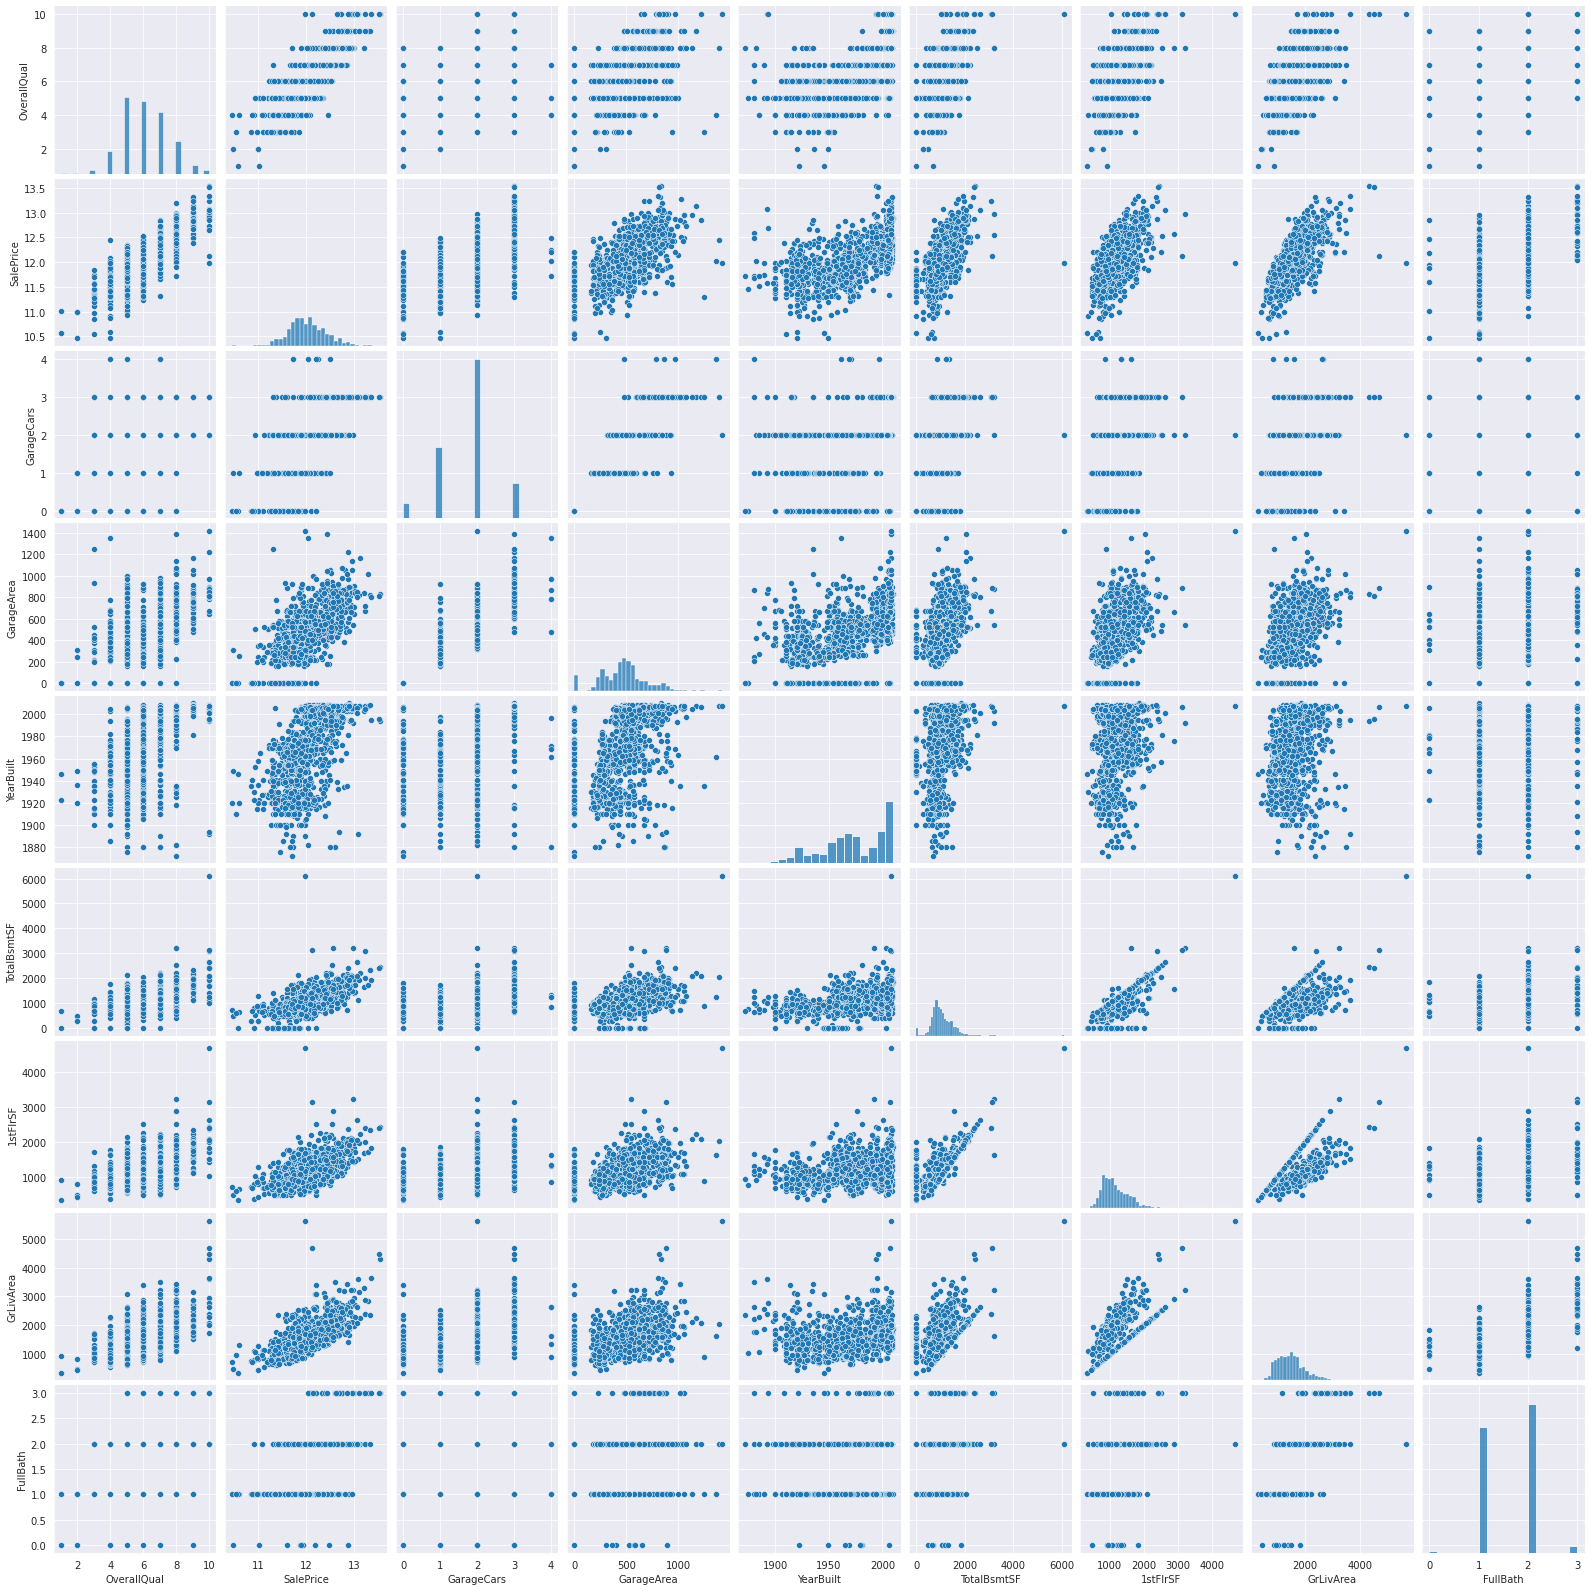

In [ ]:
sns.pairplot(train_df,vars=get_features_max_corr_score(corr_mat,targer_variable='SalePrice', n=8));

# Data Preparation
$ \textbf {Quality and efforts invested in data exploration differentiates a good model from a bad model!}$

Concatenate the train and test data in the same dataframe

In [ ]:
def concat_train_test_dfs(train_df, test_df, target_col_name):
  i_train      = train_df.shape[0]
  ntest       = test_df.shape[0]
  y_train     = train_df[target_col_name].values
  all_data_df = pd.concat((train_df, test_df)).reset_index(drop=True)
  all_data_df.drop([target_col_name], axis=1, inplace=True)
  print(f'all_data_df size is: {all_data_df.shape}')
  return all_data_df, y_train, i_train

all_data_df, y_train, i_train = concat_train_test_dfs(train_df, test_df, 'SalePrice')

continuous_cols = list(set(continuous_cols)-set(['SalePrice']))

all_data_df size is: (2919, 81)


#### Map ordinal categories features to numbers

In [ ]:
# ExterQual, 
# ExterCond, 
# BsmtQual, 
# BsmtCond, 
# HeatingQC, 
# KitchenQual, 
# FireplaceQu, 
# GarageQual, 
# GarageCond, 
# PoolQC

#  Ex	Excellent
#  Gd	Good
#  TA	Average/Typical
#  Fa	Fair
#  Po	Poor
#  NA No

# BsmtExposure:
#----------------
#  Gd	Good Exposure
#  Av	Average Exposure (split levels or foyers typically score average or above)	
#  Mn	Mimimum Exposure
#  No	No Exposure
#  NA	No Basement

# BsmtFinType1/2:
#-----------------
#  GLQ	Good Living Quarters
#  ALQ	Average Living Quarters
#  BLQ	Below Average Living Quarters	
#  Rec	Average Rec Room
#  LwQ	Low Quality
#  Unf	Unfinshed
#  NA	No Basement

ordinal_cond_qual_features = {
 
'BsmtCond'    : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
'ExterQual'   : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
'ExterCond'   : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], 
'BsmtQual'    : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
'HeatingQC'   : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], 
'KitchenQual' : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], 
'FireplaceQu' : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], 
'GarageQual'  : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'], 
'GarageCond'  : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
'PoolQC'      : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'], 
'LandSlope'   : ['Gtl', 'Mod', 'Sev'],
'Functional'  : ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],

}

In [ ]:
for col, scala in ordinal_cond_qual_features.items():
  all_data_df[col] = all_data_df[col].apply(lambda x: {k:i for i,k in enumerate(scala)}.get(x,x))

In [ ]:
print(f'Categorical_cols: {len(categorical_cols)}')
print(f'Ordinal cols: {len(list(ordinal_cond_qual_features.keys()))}')
print('Subrtact ordinal from categorical colums list...')

categorical_cols = list(set(categorical_cols) - set(list(ordinal_cond_qual_features.keys())))

print(f'Categorical_cols: {len(categorical_cols)}')

Categorical_cols: 59
Ordinal cols: 16
Subrtact ordinal from categorical colums list...
Categorical_cols: 43


## Missing Value

### Why Is Data Missing From The Dataset
There can be multiple reasons why certain values are missing from the data.
Reasons for the missing data from the dataset affect the approach of handling missing data. So it’s necessary to understand why the data could be missing.

Some of the reasons are listed below:
* Past data might get corrupted due to improper maintenance.
* Observations are not recorded for certain fields due to some reasons. There might be a failure in recording the values due to human error.
* The user has not provided the values intentionally.

### Types Of Missing Value
Formally the missing values are categorized as follows:

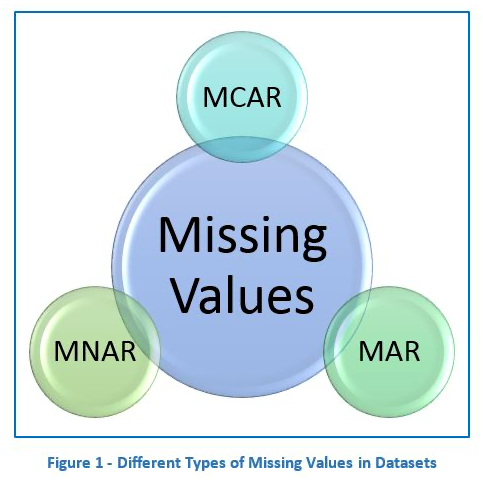

#### **Missing Completely At Random (MCAR)**
In MCAR, the probability of data being missing is the same for all the observations.

In this case, there is no relationship between the missing data and any other values observed or unobserved (the data which is not recorded) within the given dataset.

That is, missing values are completely independent of other data. There is no pattern.

In the case of MCAR, the data could be missing due to human error, some system/equipment failure, loss of sample, or some unsatisfactory technicalities while recording the values.

For Example, suppose in a library there are some overdue books. Some values of overdue books in the computer system are missing. The reason might be a human error like the librarian forgot to type in the values. So, the missing values of overdue books are not related to any other variable/data in the system.

It should not be assumed as it’s a rare case. The advantage of such data is that the statistical analysis remains unbiased.





#### **Missing At Random (MAR)**

Missing at random (MAR) means that the reason for missing values can be explained by variables on which you have complete information as there is some relationship between the missing data and other values/data.

In this case, the data is not missing for all the observations. It is missing only within sub-samples of the data and there is some pattern in the missing values.

For example, if you check the survey data, you may find that all the people have answered their ‘Gender’ but ‘Age’ values are mostly missing for people who have answered their ‘Gender’ as ‘female’. (The reason being most of the females don’t want to reveal their age.)

So, the probability of data being missing depends only on the observed data.

In this case, the variables ‘Gender’ and ‘Age’ are related and the reason for missing values of the ‘Age’ variable can be explained by the ‘Gender’ variable but you can not predict the missing value itself.

#### **Missing Not At Random (MNAR)**

Missing values depend on the unobserved data.

If there is some structure/pattern in missing data and other observed data can not explain it, then it is Missing Not At Random (MNAR).

If the missing data does not fall under the MCAR or MAR then it can be categorized as MNAR.

It can happen due to the reluctance of people in providing the required information. A specific group of people may not answer some questions in a survey.

For example, suppose the name and the number of overdue books are asked in the poll for a library. So most of the people having no overdue books are likely to answer the poll. People having more overdue books are less likely to answer the poll.

So in this case, the missing value of the number of overdue books depends on the people who have more books overdue.

Another example, people having less income may refuse to share that information in a survey.

### Missing Value Treatment
$\text {Methods to treat missing values}:$
1. **Do Nothing**: You just let the algorithm handle the missing data. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false). However, other algorithms will panic and throw an error complaining about the missing values (ie. Scikit learn — LinearRegression). In that case, you will need to handle the missing data and clean it before feeding it to the algorithm.
2. **Imputation Using (Mean/Median) Values**: This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data. **Pros**: (1) Easy and fast (2) Works well with small numerical datasets. **Cons**: (1) Doesn’t factor the correlations between features. It only works on the column level (2) Will give poor results on encoded categorical features (do NOT use it on categorical features) (3) Not very accurate (4) Doesn’t account for the uncertainty in the imputations.


```

#Impute the values using scikit-learn SimpleImpute Class

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

```


3. **Imputation Using (Most Frequent) or (Zero/Constant) Values**: It works with categorical features (strings or numerical representations) by replacing missing data with the most frequent values within each column. **Pros**: Works well with categorical features. **Cons**: (1) It also doesn’t factor the correlations between features (2) It can introduce bias in the data. Zero or Constant imputation — as the name suggests — it replaces the missing values with either zero or any constant value you specify.



```

#Impute the values using scikit-learn SimpleImpute Class

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

```



4. **Imputation Using k-NN**: The *k* nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood. **Pros**: Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset). **Cons**: (1) Computationally expensive. KNN works by storing the whole training dataset in memory (2) K-NN is quite sensitive to **outliers** in the data (unlike SVM).



```

#Start the KNN training

imputed_training=fast_knn(train.values, k=30)

```



5. **Imputation Using Multivariate Imputation by Chained Equation ([MICE](https://cran.r-project.org/web/packages/miceRanger/vignettes/miceAlgorithm.html))**: This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

```
from impyute.imputation.cs import mice

#Start the MICE training

imputed_training=mice(train.values)
```
6. **Imputation Using Deep Learning ([Datawig](https://github.com/awslabs/datawig))**: This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training. **Pros**: (1) Quite accurate compared to other methods (2) It has some functions that can handle categorical data (Feature Encoder) (3) It supports CPUs and GPUs. **Cons**: (1) Single Column imputation (2) Can be quite slow with large datasets (3) You have to specify the columns that contain information about the target column that will be imputed. 

**Other Imputation Methods**:

**Stochastic regression imputation**:
It is quite similar to regression imputation which tries to predict the missing values by regressing it from other related variables in the same dataset plus some random residual value.

**Extrapolation and Interpolation**:
It tries to estimate values from other observations within the range of a discrete set of known data points.

**Hot-Deck imputation**:
Works by randomly choosing the missing value from a set of related and similar variables.
In conclusion, there is no perfect way to compensate for the missing values in a dataset. Each strategy can perform better for certain datasets and missing data types but may perform much worse on other types of datasets. There are some set rules to decide which strategy to use for particular types of missing values, but beyond that, you should experiment and check which model works best for your dataset.



https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e


https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

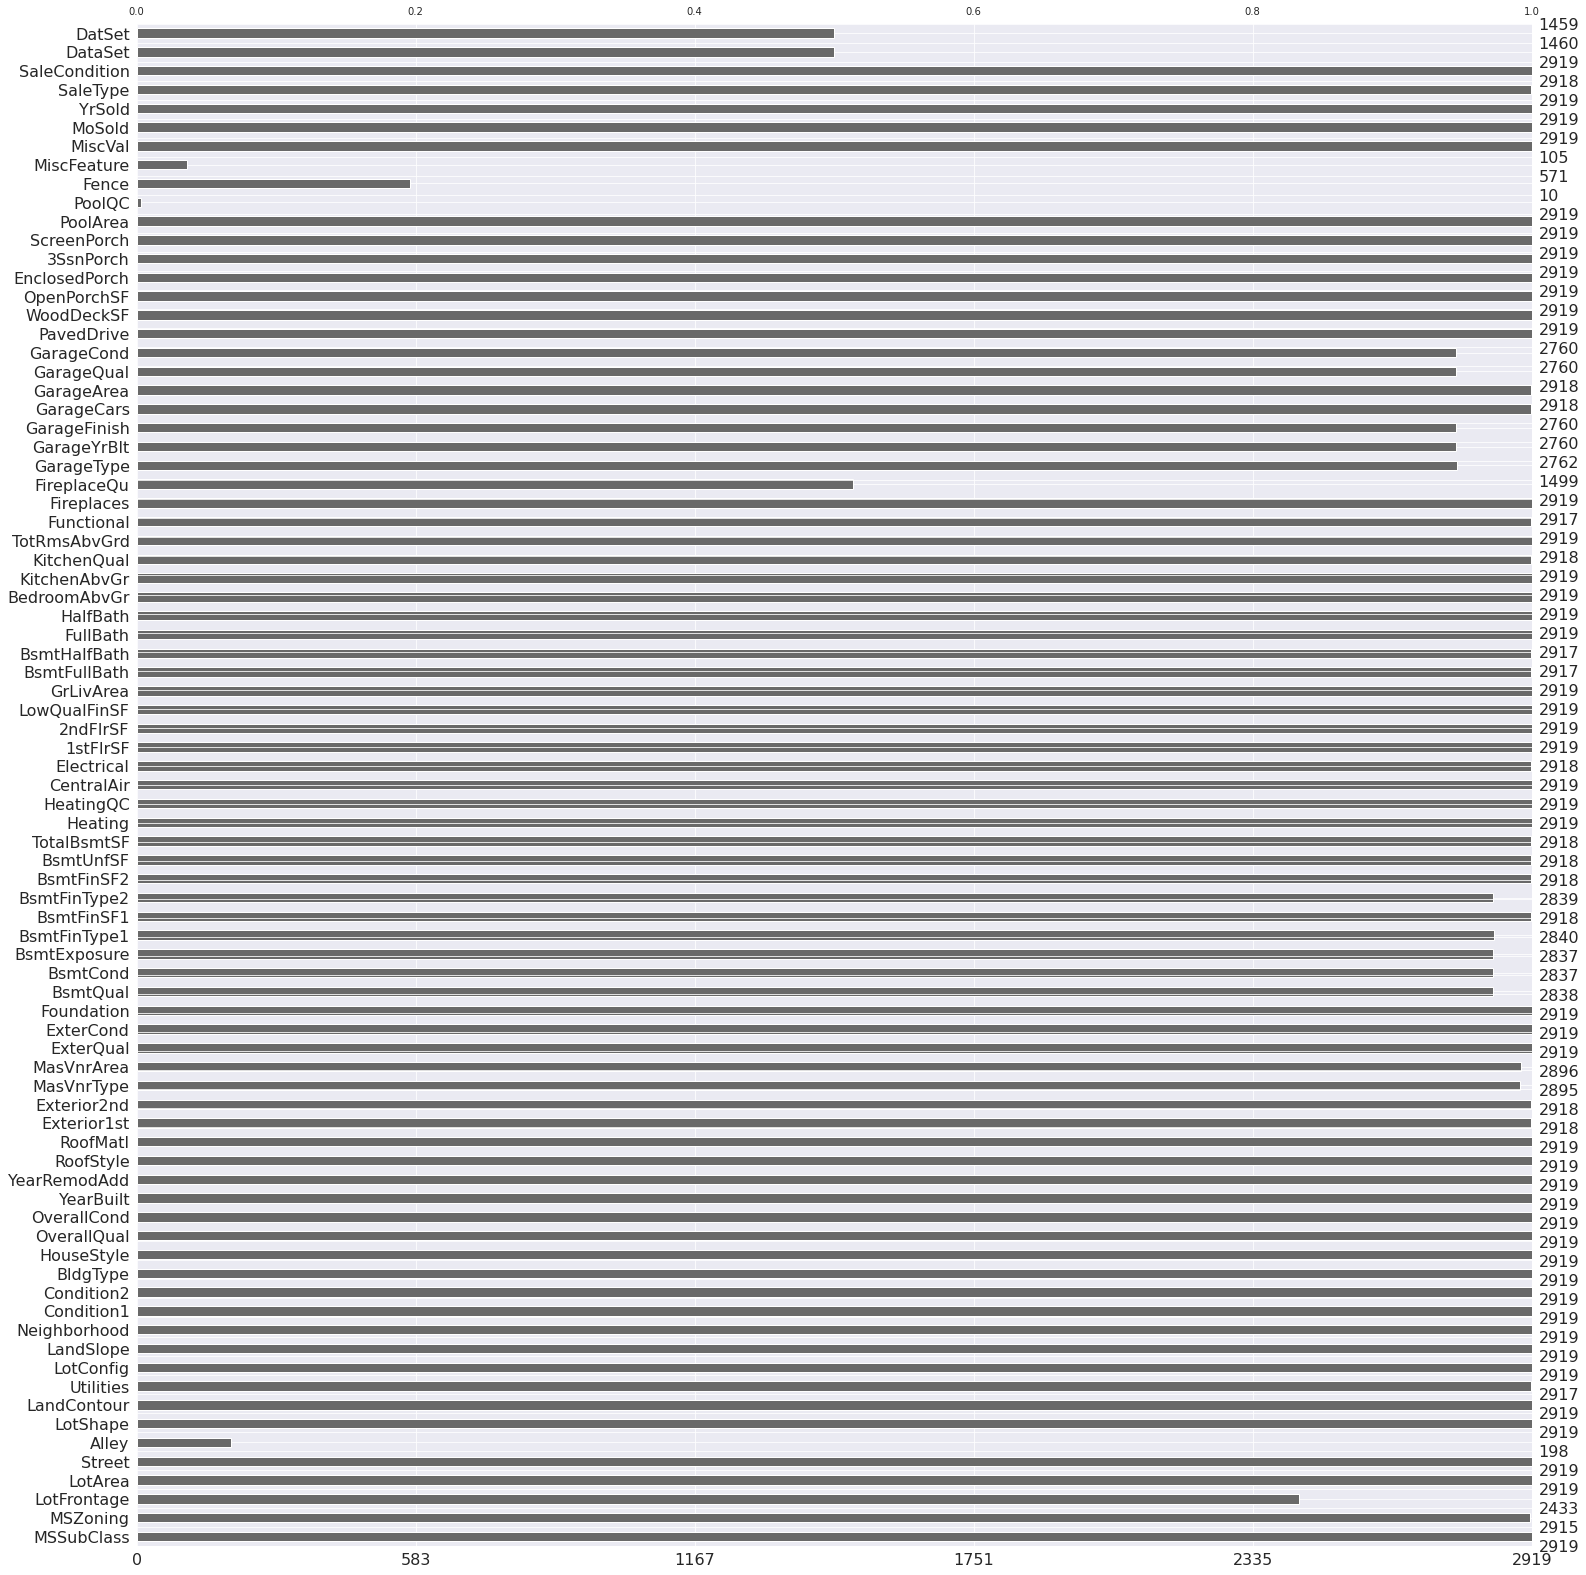

In [ ]:
import missingno as msno

msno.bar(all_data_df);

### Correlations of the nullity between each of the different columns

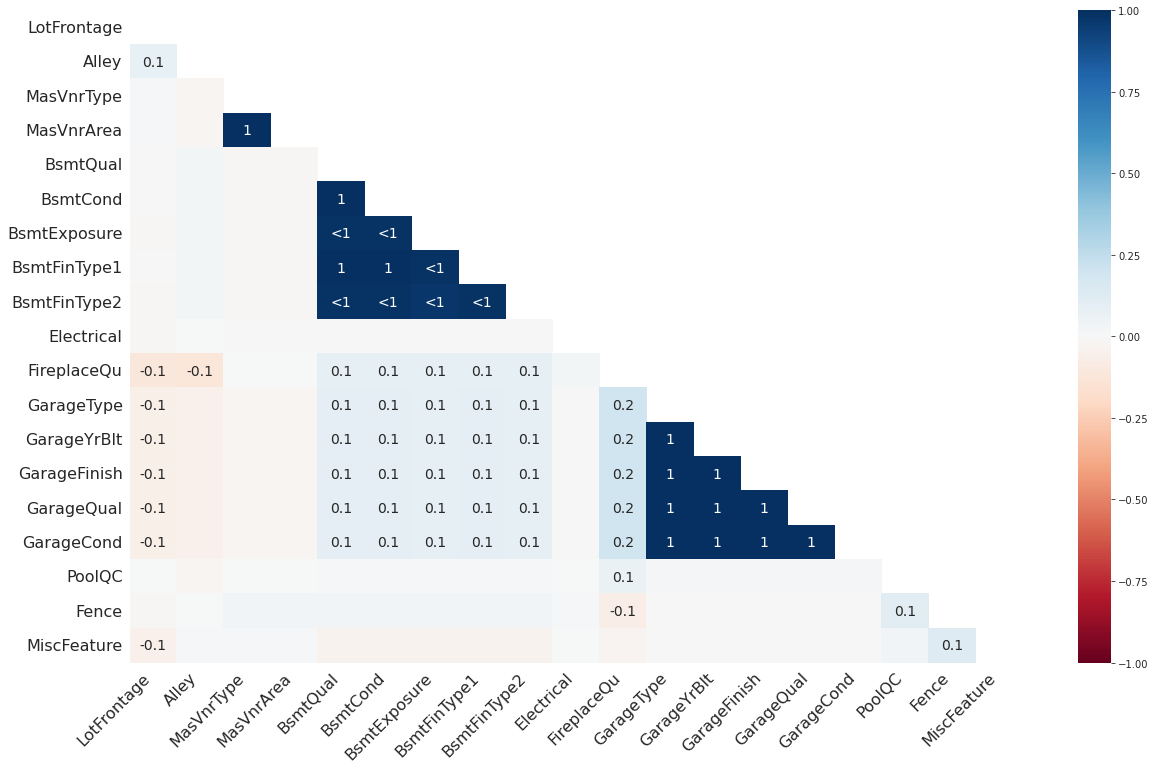

In [ ]:
msno.heatmap(train_df);

### Missing values columns

In [ ]:
def print_null_values_info(df):
  null_cols = df.columns[df.isnull().any()]
  return df[null_cols].info()

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   float64
 9   BsmtCond      2837 non-null   float64
 10  BsmtExposure  2837 non-null   float64
 11  BsmtFinType1  2840 non-null   float64
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   float64
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

In [ ]:
def get_missing_data_df(df):
  total        = df.isnull().sum().sort_values(ascending=False)
  percent      = df.isnull().mean().round(6).mul(100).sort_values(ascending=False) 
  m_df         = pd.concat([total, percent], axis=1, keys=['total_null', 'null_percent'])
  return m_df[m_df['null_percent']>0.0]

get_missing_data_df(all_data_df)

,total_null,null_percent
PoolQC,2909,99.6574
MiscFeature,2814,96.4029
Alley,2721,93.2169
Fence,2348,80.4385
DatSet,1460,50.0171
DataSet,1459,49.9829
FireplaceQu,1420,48.6468
LotFrontage,486,16.6495
GarageYrBlt,159,5.4471
GarageFinish,159,5.4471


#### PoolQC column

PoolQC fillna based on PoolArea 

In [ ]:
all_data_df[(all_data_df['PoolArea'] > 0) & (all_data_df['PoolQC'].isnull())][['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
2420,368,NaN
2503,444,NaN
2599,561,NaN


In [ ]:
poolQC_median = all_data_df[~all_data_df['PoolQC'].isnull()]['PoolQC'].median()

all_data_df.loc[(all_data_df['PoolArea'] > 0) & (all_data_df['PoolQC'].isnull()), 'PoolQC'] = \
all_data_df[(all_data_df['PoolArea'] > 0) & (all_data_df['PoolQC'].isnull())]['PoolQC']\
     .fillna(poolQC_median)

In [ ]:
all_data_df['PoolQC'] = all_data_df['PoolQC'].fillna(0)

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   float64
 9   BsmtCond      2837 non-null   float64
 10  BsmtExposure  2837 non-null   float64
 11  BsmtFinType1  2840 non-null   float64
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   float64
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

#### Garage* columns

In [ ]:
# In ordinal garage columns, fillna with '0'
for col in ('GarageCond','GarageQual','GarageYrBlt','GarageArea', 'GarageCars'):
        all_data_df[col] = all_data_df[col].fillna(0)
# In non ordinal columns put the string 'None' (will filtered in one hot columns incoding) 
for col in ('GarageType', 'GarageFinish'):
        all_data_df[col] = all_data_df[col].fillna('None')

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   float64
 9   BsmtCond      2837 non-null   float64
 10  BsmtExposure  2837 non-null   float64
 11  BsmtFinType1  2840 non-null   float64
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   float64
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

#### Bsm* (Basement) columns

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data_df[col] = all_data_df[col].fillna(0)

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Alley        198 non-null    object 
 3   Utilities    2917 non-null   object 
 4   Exterior1st  2918 non-null   object 
 5   Exterior2nd  2918 non-null   object 
 6   MasVnrType   2895 non-null   object 
 7   MasVnrArea   2896 non-null   float64
 8   Electrical   2918 non-null   object 
 9   KitchenQual  2918 non-null   float64
 10  Functional   2917 non-null   float64
 11  FireplaceQu  1499 non-null   float64
 12  Fence        571 non-null    object 
 13  MiscFeature  105 non-null    object 
 14  SaleType     2918 non-null   object 
 15  DataSet      1460 non-null   object 
 16  DatSet       1459 non-null   object 
dtypes: float64(5), object(12)
memory usage: 387.8+ KB


#### FireplaceQu column

In [ ]:
all_data_df['FireplaceQu'] = all_data_df['FireplaceQu'].fillna(0)

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Alley        198 non-null    object 
 3   Utilities    2917 non-null   object 
 4   Exterior1st  2918 non-null   object 
 5   Exterior2nd  2918 non-null   object 
 6   MasVnrType   2895 non-null   object 
 7   MasVnrArea   2896 non-null   float64
 8   Electrical   2918 non-null   object 
 9   KitchenQual  2918 non-null   float64
 10  Functional   2917 non-null   float64
 11  Fence        571 non-null    object 
 12  MiscFeature  105 non-null    object 
 13  SaleType     2918 non-null   object 
 14  DataSet      1460 non-null   object 
 15  DatSet       1459 non-null   object 
dtypes: float64(4), object(12)
memory usage: 365.0+ KB


#### MasVnr* columns

Nan most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [ ]:
# ❗ check other methods !
all_data_df['MasVnrType'] = all_data_df['MasVnrType'].fillna('None')
all_data_df['MasVnrArea'] = all_data_df['MasVnrArea'].fillna(0)

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Alley        198 non-null    object 
 3   Utilities    2917 non-null   object 
 4   Exterior1st  2918 non-null   object 
 5   Exterior2nd  2918 non-null   object 
 6   Electrical   2918 non-null   object 
 7   KitchenQual  2918 non-null   float64
 8   Functional   2917 non-null   float64
 9   Fence        571 non-null    object 
 10  MiscFeature  105 non-null    object 
 11  SaleType     2918 non-null   object 
 12  DataSet      1460 non-null   object 
 13  DatSet       1459 non-null   object 
dtypes: float64(3), object(11)
memory usage: 319.4+ KB


#### MiscFeature column

From data_description: Nan means no misc feature 

In [ ]:
all_data_df['MiscFeature'] = all_data_df['MiscFeature'].fillna('None')

#### Functional column

From data_description: None means means typical

In [ ]:
all_data_df['Functional'] = all_data_df['Functional'].fillna('Typ')


In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Alley        198 non-null    object 
 3   Utilities    2917 non-null   object 
 4   Exterior1st  2918 non-null   object 
 5   Exterior2nd  2918 non-null   object 
 6   Electrical   2918 non-null   object 
 7   KitchenQual  2918 non-null   float64
 8   Fence        571 non-null    object 
 9   SaleType     2918 non-null   object 
 10  DataSet      1460 non-null   object 
 11  DatSet       1459 non-null   object 
dtypes: float64(2), object(10)
memory usage: 273.8+ KB


#### Alley column

From data_description: Nan means no Alley

In [ ]:
all_data_df['Alley'] = all_data_df['Alley'].fillna('None')

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Utilities    2917 non-null   object 
 3   Exterior1st  2918 non-null   object 
 4   Exterior2nd  2918 non-null   object 
 5   Electrical   2918 non-null   object 
 6   KitchenQual  2918 non-null   float64
 7   Fence        571 non-null    object 
 8   SaleType     2918 non-null   object 
 9   DataSet      1460 non-null   object 
 10  DatSet       1459 non-null   object 
dtypes: float64(2), object(9)
memory usage: 251.0+ KB


#### Fence column

From data_description: Nan means no Fance

In [ ]:
all_data_df['Fence'] = all_data_df['Fence'].fillna('None')

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Utilities    2917 non-null   object 
 3   Exterior1st  2918 non-null   object 
 4   Exterior2nd  2918 non-null   object 
 5   Electrical   2918 non-null   object 
 6   KitchenQual  2918 non-null   float64
 7   SaleType     2918 non-null   object 
 8   DataSet      1460 non-null   object 
 9   DatSet       1459 non-null   object 
dtypes: float64(2), object(8)
memory usage: 228.2+ KB


#### Electrical column

❗ check other methods !

In [ ]:
all_data_df['Electrical'] = all_data_df['Electrical'].fillna(all_data_df['Electrical'].mode()[0])

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   LotFrontage  2433 non-null   float64
 2   Utilities    2917 non-null   object 
 3   Exterior1st  2918 non-null   object 
 4   Exterior2nd  2918 non-null   object 
 5   KitchenQual  2918 non-null   float64
 6   SaleType     2918 non-null   object 
 7   DataSet      1460 non-null   object 
 8   DatSet       1459 non-null   object 
dtypes: float64(2), object(7)
memory usage: 205.4+ KB


#### LotFrontage column

Total LotFrontage Mean:   69.31
Total LotFrontage Median: 68.00


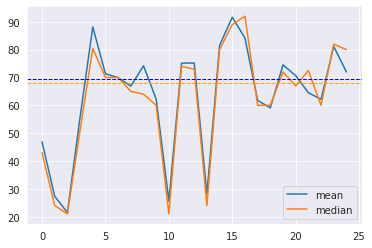

In [ ]:
mean   = all_data_df['LotFrontage'].mean()
median = all_data_df['LotFrontage'].median()
print(f'Total LotFrontage Mean:   {mean:.2f}')
print(f'Total LotFrontage Median: {median:.2f}')

res_mean   = []
res_median = []
res_name   = []
grouped = all_data_df.groupby('Neighborhood') # Street
for name, group in grouped:
  res_name.append(name)
  res_mean.append(group['LotFrontage'].mean())
  res_median.append(group['LotFrontage'].median())
lotFrontage_f_df = pd.DataFrame({'name': res_name, 'mean': res_mean, 'median': res_median})

lotFrontage_f_df.plot()
plt.axhline(y=mean, 
            color='b', 
            linestyle='--',
            lw=1.0,);
plt.axhline(y=median, 
            color='orange', 
            linestyle='--',
            lw=1.0,);

In [ ]:
all_data_df['LotFrontage'] = all_data_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSZoning     2915 non-null   object 
 1   Utilities    2917 non-null   object 
 2   Exterior1st  2918 non-null   object 
 3   Exterior2nd  2918 non-null   object 
 4   KitchenQual  2918 non-null   float64
 5   SaleType     2918 non-null   object 
 6   DataSet      1460 non-null   object 
 7   DatSet       1459 non-null   object 
dtypes: float64(1), object(7)
memory usage: 182.6+ KB


#### MSZoning column

In [ ]:
all_data_df['MSZoning'] = all_data_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Utilities    2917 non-null   object 
 1   Exterior1st  2918 non-null   object 
 2   Exterior2nd  2918 non-null   object 
 3   KitchenQual  2918 non-null   float64
 4   SaleType     2918 non-null   object 
 5   DataSet      1460 non-null   object 
 6   DatSet       1459 non-null   object 
dtypes: float64(1), object(6)
memory usage: 159.8+ KB


#### Utilities column

In [ ]:
print(f'Train \'Utilities\' value counts:')
print('-'*30)
print(all_data_df[:i_train]['Utilities'].value_counts())
print('#'*30)
print('#'*30)
print(f'Test \'Utilities\' value counts:')
print('-'*30)
all_data_df[i_train:]['Utilities'].value_counts()

Train 'Utilities' value counts:
------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
##############################
##############################
Test 'Utilities' value counts:
------------------------------


AllPub    1457
Name: Utilities, dtype: int64

For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [ ]:
all_data_df = all_data_df.drop(['Utilities'], axis=1)

In [ ]:
categorical_cols = list(set(categorical_cols)-set(['Utilities']))

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Exterior1st  2918 non-null   object 
 1   Exterior2nd  2918 non-null   object 
 2   KitchenQual  2918 non-null   float64
 3   SaleType     2918 non-null   object 
 4   DataSet      1460 non-null   object 
 5   DatSet       1459 non-null   object 
dtypes: float64(1), object(5)
memory usage: 137.0+ KB


#### Exterior* column

In [ ]:
all_data_df['Exterior1st'] = all_data_df['Exterior1st'].fillna(all_data_df['Exterior1st'].mode()[0])
all_data_df['Exterior2nd'] = all_data_df['Exterior2nd'].fillna(all_data_df['Exterior2nd'].mode()[0])

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KitchenQual  2918 non-null   float64
 1   SaleType     2918 non-null   object 
 2   DataSet      1460 non-null   object 
 3   DatSet       1459 non-null   object 
dtypes: float64(1), object(3)
memory usage: 91.3+ KB


#### KitchenQual columns

In [ ]:
all_data_df['KitchenQual'] = all_data_df['KitchenQual'].fillna(all_data_df['KitchenQual'].mode()[0])

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SaleType  2918 non-null   object
 1   DataSet   1460 non-null   object
 2   DatSet    1459 non-null   object
dtypes: object(3)
memory usage: 68.5+ KB


#### SaleType column

In [ ]:
all_data_df['SaleType'] = all_data_df['SaleType'].fillna(all_data_df['SaleType'].mode()[0])

In [ ]:
print_null_values_info(all_data_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DataSet  1460 non-null   object
 1   DatSet   1459 non-null   object
dtypes: object(2)
memory usage: 45.7+ KB


## Outlier Detection and Treatment
Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot.
Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

### Reasons for outliers in data

1. Errors during data entry or a faulty measuring device (a faulty sensor may result in extreme readings).
2. Natural occurrence (salaries of junior level employees vs C-level employees)

### 11 different ways for Outlier Detection in Python
https://machinelearninghd.com/outlier-detection-python/



#### Year columns 

In [ ]:
all_data_df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000
mean,1971.312778,1984.264474,1870.364166,2007.792737
std,30.291442,20.894344,449.686321,1.314964
min,1872.000000,1950.000000,0.000000,2006.000000
25%,1953.500000,1965.000000,1957.000000,2007.000000
50%,1973.000000,1993.000000,1977.000000,2008.000000
75%,2001.000000,2004.000000,2001.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


The average number of years garage built after house built

In [ ]:
GarageYrBlt_after_YearBuilt = [r['GarageYrBlt']-r['YearBuilt'] for _,r in all_data_df.iterrows()\
                                                                   if r['GarageYrBlt'] >= r['YearBuilt']]
gaps_df = pd.DataFrame({'gap': GarageYrBlt_after_YearBuilt})
gaps_df.describe()

,gap
count,2742.000000
mean,5.299052
std,16.279602
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,201.000000


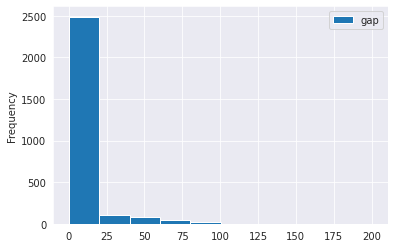

In [ ]:
gaps_df.plot(kind='hist');

GarageYrBlt before YearBuilt

In [ ]:
all_data_df[(all_data_df['GarageYrBlt'] < all_data_df['YearBuilt'])\
          & (all_data_df['GarageYrBlt'] != 0)][['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
29,1920.0,1927
93,1900.0,1910
324,1961.0,1967
600,2003.0,2005
736,1949.0,1950
1103,1954.0,1959
1376,1925.0,1930
1414,1922.0,1923
1418,1962.0,1963
1521,1956.0,1959


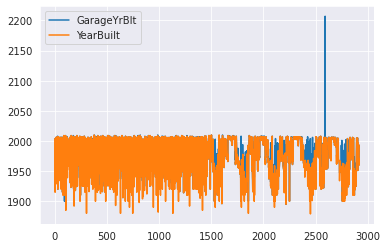

In [ ]:
all_data_df[all_data_df['GarageYrBlt']>0][['GarageYrBlt', 'YearBuilt']].plot(kind='line');

In [ ]:
all_data_df[((all_data_df['GarageYrBlt'] > 2022.0) | (all_data_df['GarageYrBlt'] < 1800.0)) &
             (all_data_df['GarageYrBlt']>0)][['GarageYrBlt', 'YearBuilt']]

,GarageYrBlt,YearBuilt
2592,2207.0,2006


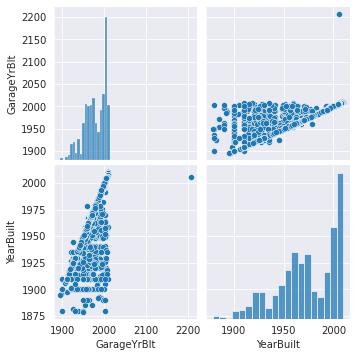

In [ ]:
sns.pairplot(all_data_df[all_data_df['GarageYrBlt'] > 0][['GarageYrBlt', 'YearBuilt']]);

Replace the 'GarageYrBlt' outliers years with the 'YearBuilt' year 

In [ ]:
all_data_df['GarageYrBlt'] = np.where((all_data_df['GarageYrBlt'] > 2022.0) | (all_data_df['GarageYrBlt'] < 1800.0), 
                                       all_data_df['YearBuilt'], #all_data_df['GarageYrBlt'].median(),
                                       all_data_df['GarageYrBlt'])

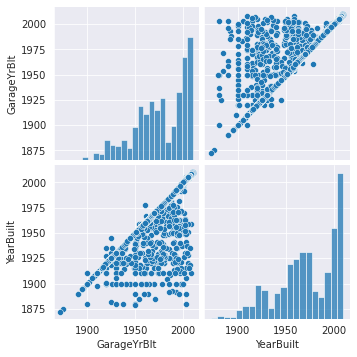

In [ ]:
sns.pairplot(all_data_df[all_data_df['GarageYrBlt'] > 0][['GarageYrBlt', 'YearBuilt']]);

## Feature Selection

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable. Some predictive modeling problems have a large number of variables that can slow the development and training of models and require a large amount of system memory. Additionally, the performance of some models can degrade when including input variables that are not relevant to the target variable.

https://scikit-learn.org/stable/modules/feature_selection.html

### Feature Selection Methods
* **Unsupervised**: Do not use the target variable (e.g. remove redundant variables).
  * Correlation
* **Supervised**: Use the target variable (e.g. remove irrelevant variables)
  * Wrapper: Search for well-performing subsets of features
    * RFE
  * Filter: Select subsets of features based on their relationship with the target.
    * Statistical Methods
    * Feature Importance Methods
  * Intrinsic: Algorithms that perform automatic feature selection during training
    * Decision Trees
* **Dimensionality Reduction**: Project input data into a lower-dimensional feature space

## Feature Engineering

$\text {What is Feature Engineering?}$ Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

Feature engineering itself can be divided in 2 steps:

1. Variable transformation - feature scaling for example, When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution.
2. Variable / Feature creation - A process to generate a new variables / features based on existing variable(s). For example, say, we have date(dd-mm-yy) as an input variable in a data set. We can generate new variables like day, month, year, week, weekday that may have better relationship with target variable. This step is used to highlight the hidden relationship in a variable


### Skewness
*   Is the degree of distortion from the symmetrical bell curve or the normal curve
*   So, a symmetrical distribution will have a skewness of "0"
*   There are two types of Skewness: Positive and Negative
* Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter
* In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price
* Negative Skewness means the tail on the left side of the distribution is longer and fatter
* In negative Skewness the mean and median will be less than the mode
* Skewness differentiates in extreme values in one versus the other tail



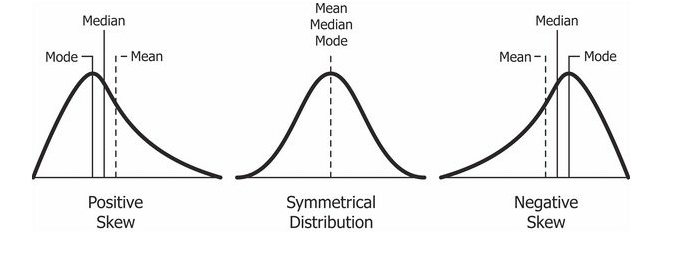

#### Find and fix swewed features

In [ ]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in all_data_df.columns:
    if all_data_df[i].dtype in numeric_dtypes:
        numeric.append(i)

In [ ]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Find skewed numerical features

def skewed_numerical_features(df, numeric_features, skew_t=0.5):
  skew_features = df[numeric_features]\
                      .apply(lambda x: skew(x))\
                      .sort_values(ascending=False, key=abs)

  high_skew  = skew_features[np.abs(skew_features) > skew_t]

  print(f'There are {high_skew.shape[0]} numerical features with Skew > {skew_t}')
  skewness = pd.DataFrame({'skew' : high_skew})
  return pd.DataFrame(high_skew,columns=['skwe']), skewness

high_skew, skewed_numerical_features_df = skewed_numerical_features(all_data_df, numeric, skew_t=0.5)
high_skew.head()

There are 39 numerical features with Skew > 0.5


,skwe
MiscVal,21.947195
PoolArea,16.898328
PoolQC,15.866986
LotArea,12.822431
LowQualFinSF,12.088761


In [ ]:
# Normalize skewed features
for i,_ in skewed_numerical_features_df.iterrows():
    all_data_df[i] = boxcox1p(all_data_df[i], boxcox_normmax(all_data_df[i] + 1))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


### Create new features 

In [ ]:
all_data_df['HasWoodDeck']        = all_data_df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['HasOpenPorch']       = all_data_df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['HasEnclosedPorch']   = all_data_df['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['Has3SsnPorch']       = all_data_df['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['HasScreenPorch']     = all_data_df['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['Haspool']            = all_data_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['Has2ndfloor']         = all_data_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['Hasgarage']          = all_data_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['Hasbsmt']            = all_data_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['Hasfireplace']        = all_data_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_data_df['GarageAgeCat']       = all_data_df['GarageYrBlt'].apply(lambda x: 'recent' if x >= 2000 else 'old')
categorical_cols.append('GarageAgeCat')

all_data_df['YearsSinceRemodel']  = all_data_df['YrSold'].astype(int) - all_data_df['YearRemodAdd'].astype(int)
all_data_df['Age']                = all_data_df['YrSold'].astype(int) - all_data_df['YearBuilt'].astype(int)
all_data_df['Newness']            = np.sqrt(all_data_df['YearRemodAdd'].astype(int) * all_data_df['GrLivArea'].astype(int))
all_data_df['GarageAge']          = all_data_df['YrSold'].astype(int) - all_data_df['GarageYrBlt'].astype(int)
all_data_df['Total_Home_Quality'] = all_data_df['OverallQual'].astype(int) + all_data_df['OverallCond'].astype(int)
all_data_df['TotalSF']            = all_data_df['TotalBsmtSF'].astype(int) + all_data_df['1stFlrSF'].astype(int) + all_data_df['2ndFlrSF'].astype(int)
all_data_df['YrBltAndRemod']      = all_data_df['YearBuilt'].astype(int) + all_data_df['YearRemodAdd'].astype(int)
all_data_df['TotalSqrFootage']    = (all_data_df['BsmtFinSF1'].astype(int)\
                                     + all_data_df['BsmtFinSF2'].astype(int)\
                                     + all_data_df['1stFlrSF'].astype(int)\
                                     + all_data_df['2ndFlrSF']).astype(int)
all_data_df['TotalBathrooms']     = (all_data_df['FullBath'].astype(int)\
                                     + (0.5 * all_data_df['HalfBath'].astype(int))\
                                     + all_data_df['BsmtFullBath'].astype(int)\
                                     + (0.5 * all_data_df['BsmtHalfBath'].astype(int)) )
all_data_df['TotalPorchSf']       = (all_data_df['OpenPorchSF'].astype(int)\
                                     + all_data_df['3SsnPorch'].astype(int)\
                                     + all_data_df['EnclosedPorch'].astype(int)\
                                     + all_data_df['ScreenPorch'].astype(int)\
                                     + all_data_df['WoodDeckSF'].astype(int))

all_data_df['Spaciousness']       = (all_data_df['1stFlrSF'].astype(int) + all_data_df['2ndFlrSF'].astype(int)) / all_data_df['TotRmsAbvGrd'].astype(int)
all_data_df['MedNhbdArea']        = all_data_df.groupby('Neighborhood')['GrLivArea'].transform('median')
all_data_df['Overall']            = (all_data_df['OverallCond'] * all_data_df['OverallQual'])
all_data_df['A']                  = np.sqrt(all_data_df['Overall'] * all_data_df['GrLivArea'])

In [ ]:
def func(df, f_list, suffix, function):
  for f in f_list:
    df[f+suffix] = function(df[f])
  return df

log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF', 'Overall', 'A', 'MedNhbdArea', 'Newness']

squared_features = ['YearRemodAdd', 'LotFrontage_log1p', 
                    'TotalBsmtSF_log1p', '1stFlrSF_log1p', '2ndFlrSF_log1p', 'GrLivArea_log1p',
                    'GarageCars_log1p', 'GarageArea_log1p', 'Overall_log1p','Overall', 'A_log1p', 'A', 'MedNhbdArea_log1p', 'Newness_log1p']

# all_data_df = func(all_data_df, 
#                    log_features, 
#                    suffix='_log1p', 
#                    function=np.log1p)

# all_data_df = func(all_data_df, 
#                    squared_features, 
#                    suffix='_sq', 
#                    function=np.square)

### One hot encoding

In [ ]:
object_cols = [col_name for col_name in all_data_df.columns if all_data_df[col_name].dtype == 'object']

all_data_df = pd.get_dummies(all_data_df,
                          columns=set(object_cols + categorical_cols),
                          prefix=set(object_cols + categorical_cols),
                          drop_first=True)

all_data_df = all_data_df[all_data_df.columns.drop(list(all_data_df.filter(regex='_None')))]
all_data_df.shape

(2919, 350)

### Feature Scaling

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

1. **Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. $X^{'}=\frac{X-X_{min}}{X_{max}-X_{min}}$. 
Here, $X_{max}$ and $X_{min}$ are the maximum and the minimum values of the feature respectively.
* When the value of X is the minimum value in the column, the numerator will be 0, and hence $X^{'}$ is 0,
* On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of $X^{'}$ is 1
* If the value of X is between the minimum and the maximum value, then the value of $X^{'}$ is between 0 and 1



```
#Data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

#Fit scaler on training data
norm = MinMaxScaler().fit(X_train)

#Transform training data
X_train_norm = norm.transform(X_train)

#Transform testing dataabs
X_test_norm = norm.transform(X_test)
```




2. **Standardization** is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. Here’s the formula for standardization: $X^{'}=\frac{X-μ}{σ}$, $μ$ is the mean of the feature values and $σ$ is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.




```

#Data standardization with  sklearn
from sklearn.preprocessing import StandardScale

#Fit on training data column
scale = StandardScaler().fit(X_train_stand[[0]])

```



**Normalize or Standardize?**
Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.
* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

In [ ]:
# Check the skew of all numerical features
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [ ]:
from sklearn.preprocessing import StandardScaler

def scaling_feat(df, scaler):
  scaled_data = scaler.fit_transform(df)
  return pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

# all_data_df = scaling_feat(all_data_df, 
#                            StandardScaler())

In [ ]:
all_data_df.astype(np.float64)

,LotFrontage,LotArea,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,TotRmsAbvGrd_2.6212627891110394,TotRmsAbvGrd_2.69869688550709,TotRmsAbvGrd_2.770873388767131,TotRmsAbvGrd_2.8384661016574926,BsmtFullBath_0.9927838847195595,BsmtFullBath_1.9758626890790278,BsmtFullBath_2.952691563457896,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,14.663551,13.424520,0.00000,3.035229e+51,2003.0,19.378557,1.597104,2.12784,12.831416,17.319680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,16.494889,13.694527,0.00000,2.444521e+51,1976.0,0.000000,1.377137,2.12784,12.831416,17.319680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,15.044953,14.034133,0.00000,2.987255e+51,2002.0,17.721069,1.597104,2.12784,12.831416,17.319680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,14.008495,13.683421,0.00000,1.482566e+51,1970.0,0.000000,1.377137,2.12784,7.929814,32.802911,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16.954474,14.550142,0.00000,2.963535e+51,2000.0,25.323127,1.597104,2.12784,12.831416,17.319680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,7.529561,10.503897,0.00000,2.328795e+51,1970.0,0.000000,1.377137,2.12784,7.929814,17.319680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2915,7.529561,10.463055,0.00000,2.328795e+51,1970.0,0.000000,1.377137,2.12784,7.929814,17.319680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2916,24.243478,15.304040,0.00000,2.147256e+51,1996.0,0.000000,1.377137,2.12784,7.929814,17.319680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2917,14.273561,13.873786,0.00000,2.780033e+51,1992.0,0.000000,1.377137,2.12784,12.831416,17.319680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Model



In [ ]:
train_df = all_data_df[:i_train]
test_df  = all_data_df[i_train:]

In [ ]:
RANDOM_STATE = 42

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

def rmsle(model, df, random_state, n_folds, y_train):
    kf   = KFold(n_splits=n_folds, 
                 shuffle=True, 
                 random_state=random_state).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(estimator=model, 
                                    X=df.values, 
                                    y=y_train, 
                                    scoring='neg_mean_squared_error', 
                                    cv=kf))
    return rmse

#### **Linear Regression**

In [ ]:
lg_model = LinearRegression()

lg_score = rmsle(model=lg_model, 
                       df=train_df, 
                       n_folds=10,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'Linear Regression score: {lg_score.mean():.4f} std: {lg_score.std():.4f}')

Linear Regression score: 0.3252 std: 0.0288


#### **$L_1$ vs. $L_2$ regularization**
* $L_2$ penalizes $weight^2$
* $L_1$ penalizes $|weight|$

Consequently, $L_2$ and $L_1$ have different derivatives:
* The derivative of $L_2$ is $2*weight$
* The derivative of $L_1$ is k (a constant, whose value is independent of weight)

You can think of the derivative of $L_2$ as a force that removes x% of the weight every time. As Zeno knew, even if you remove x percent of a number billions of times, the diminished number will still never quite reach zero. (Zeno was less familiar with floating-point precision limitations, which could possibly produce exactly zero.) At any rate, $L_2$ does not normally drive weights to zero.

You can think of the derivative of $L_1$ as a force that subtracts some constant from the weight every time. However, thanks to absolute values, $L_1$ has a discontinuity at 0, which causes subtraction results that cross 0 to become zeroed out.

##### **Lasso** - Linear Model trained with $L_1$ prior as regularizer

In [ ]:
lasso_params= {
    'lasso__alpha' :[1e-3, 5e-3, 7e-3, 1e-4, 5e-4, 7e-4, 1e-1, 5e-5, 7e-5, 1e-6, 5e-6, 7e-6]
}

gs_lasso = GridSearchCV(make_pipeline(RobustScaler(), Lasso(random_state=RANDOM_STATE)),
                        lasso_params,
                        n_jobs=-1,
                        cv=10,
                        scoring='neg_mean_squared_error')

gs_lasso.fit(train_df.values, y_train)

print(f'Best score:  {gs_lasso.best_score_}')
print(f'Best params: {gs_lasso.best_params_}')

lasso_model = make_pipeline(RobustScaler(), 
                             Lasso(alpha=gs_lasso.best_params_['lasso__alpha'], 
                                   max_iter=50000,
                                   random_state=RANDOM_STATE))

lasso_score = rmsle(model=lasso_model, 
                       df=train_df, 
                       n_folds=10,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'Lasso score: {lasso_score.mean():.4f} std: {lasso_score.std():.4f}')

Best score:  -0.016035616174578344
Best params: {'lasso__alpha': 0.0007}
Lasso score: 0.1240 std: 0.0258


##### **Ridge** - Linear Model trained with $L_2$ prior as regularizer

In [ ]:
ridge_params= {
    'ridge__fit_intercept':[True, False],
    'ridge__alpha'       :[1, 5, 10, 50],
    'ridge__solver'      :[ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

gs_ridge = GridSearchCV(make_pipeline(RobustScaler(), Ridge(random_state=RANDOM_STATE)),
                        ridge_params,
                        n_jobs=-1,
                        cv=10)

gs_ridge.fit(train_df.values, y_train) 

ridge_model = make_pipeline(RobustScaler(), 
                             Ridge(alpha=gs_ridge.best_params_['ridge__alpha'], 
                                   max_iter=50000,
                                   fit_intercept=gs_ridge.best_params_['ridge__fit_intercept'],
                                   solver=gs_ridge.best_params_['ridge__solver'],
                                   random_state=RANDOM_STATE))

ridge_score = rmsle(model=ridge_model, 
                       df=train_df, 
                       n_folds=10,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'Ridge score: {ridge_score.mean():.4f} std: {ridge_score.std():.4f}')

Ridge score: 0.1248 std: 0.0255


##### Kernel ridge regression (KRR)

In [ ]:
k_ridge_model = make_pipeline(RobustScaler(), 
                              KernelRidge(alpha=0.5, 
                                            kernel='polynomial', 
                                            degree=2, 
                                            coef0=4))

k_ridge_score = rmsle(model=k_ridge_model, 
                       df=train_df, 
                       n_folds=10,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'Kernel ridge score: {k_ridge_score.mean():.4f} std: {k_ridge_score.std():.4f}')

Kernel ridge score: 0.1246 std: 0.0219


##### **Elastic net** - Linear regression with combined $L_1$ and $L_2$ priors as regularizer



In [ ]:
e_net_model = make_pipeline(RobustScaler(), 
                            ElasticNet(alpha=7e-4, 
                                       l1_ratio=0.9, 
                                       max_iter=10000,
                                       random_state=RANDOM_STATE))

e_net_score = rmsle(model=e_net_model, 
                       df=train_df, 
                       n_folds=10,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'Elastic net score: {e_net_score.mean():.4f} std: {e_net_score.std():.4f}')

Elastic net score: 0.1240 std: 0.0259


#### **Extreme Gradient [Boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning)) (XGBoost)**


Gradient boosting refers to a class of ensemble Machine Learning (ML) algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble ML model referred to as **boosting**.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

**Extreme Gradient** Boosting, or **XGBoost** for short, is an efficient open-source implementation of the gradient boosting algorithm. As such, XGBoost is an algorithm, an open-source project, and a Python library.

It was initially developed by Tianqi Chen and was described by Chen and Carlos Guestrin in their 2016 paper titled “[XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754)”.

It is designed to be both computationally efficient (e.g. fast to execute) and highly effective, perhaps more effective than other open-source implementations

[A Guide on XGBoost hyperparameters tuning](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook)

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             gamma=0.0468, 
                             learning_rate=0.01, 
                             max_depth=5, 
                             min_child_weight=1.7817, 
                             n_estimators=2200,
                             reg_alpha=0.4640, 
                             reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state=RANDOM_STATE)

xgb_score = rmsle(model=xgb_model, 
                       df=train_df, 
                       n_folds=12,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'XGB model score: {xgb_score.mean():.4f} std: {xgb_score.std():.4f}')

XGB model score: 0.1210 std: 0.0166


In [ ]:
def print_inf_values(df):
  count = np.isinf(all_data_df).values.sum()
  print(f'The data frame contains {count} infinite values')
#print_inf_values(train_df)

#### Stacking CV Regressor

The general principle of ensembling is to combine the predictions of various models built with a given learning algorithm in order to improve robustness over a single model.


**What is meant by stacking?**
Ensemble learning is a technique widely used by ML practitioners, that combines the skills of different models to make predictions from the given data. We are using this to combine the best of multiple algorithms that can give more stable predictions with very little variance than what we get with a single regressor.

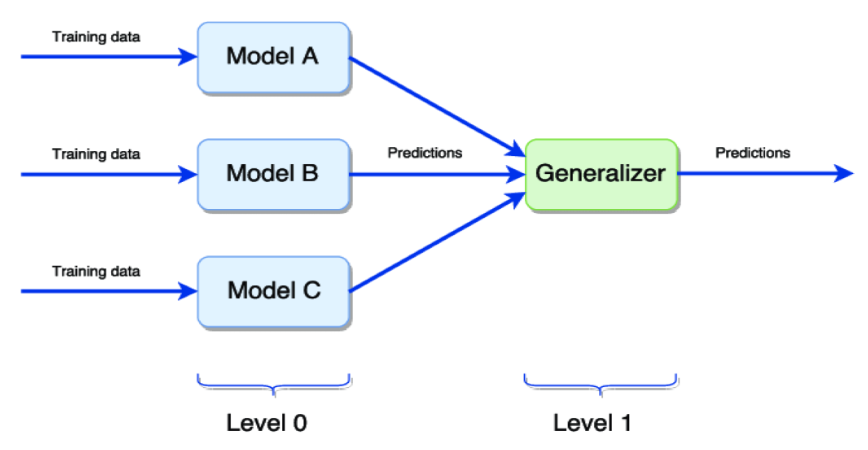

The above diagram represents the simple stacking of the models,

**Level 0**  – Training different models on the same dataset then making predictions

**Level 1** – Generalize the predictions made by different models to get the final output

The most common way of generalizer is by taking the average of all the level 0 model predictions to get the final output.


**Adding a Meta-model**

In this approach, we will train all the base models and use the predictions (out-of-fold predictions) of the base models as a training feature to the meta-model.

The meta-model is used to find the pattern between the base model predictions as features and actual predictions as the target variables.

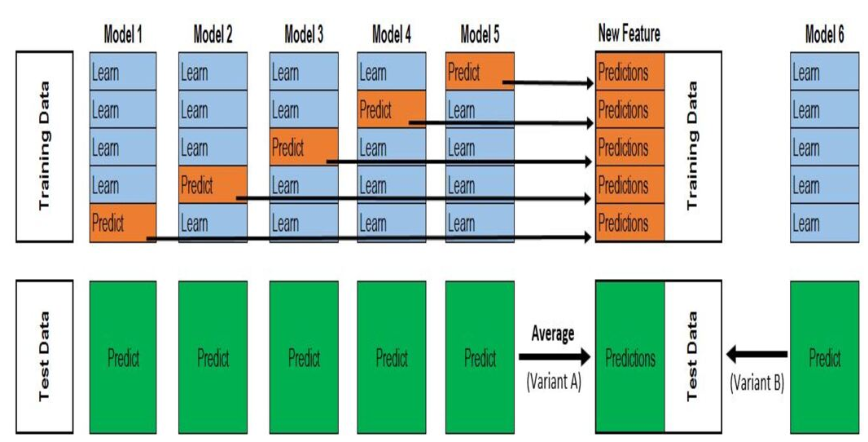

**Steps**:
1. Split the data into 2 sets training and holdout set
2. Train all the base models in the training data
3. Test base models on the holdout dataset and store the predictions(out-of-fold predictions)
4. Use the out-of-fold predictions made by the base models as input features, and the correct output as the target variable to train the meta-model

In [ ]:
%%time
from mlxtend.regressor import StackingCVRegressor

stack_models = StackingCVRegressor(regressors=(lasso_model,
                                               ridge_model, 
                                               k_ridge_model, 
                                               e_net_model, 
                                               xgb_model),
                                   meta_regressor=xgb_model,
                                   random_state=RANDOM_STATE,
                                   use_features_in_secondary=True)

stack_score = rmsle(model=stack_models, 
                       df=train_df, 
                       n_folds=12,
                       random_state=RANDOM_STATE,
                       y_train=y_train)

print(f'Stack model score: {stack_score.mean():.4f} std: {stack_score.std():.4f}')

Stack model score: 0.1182 std: 0.0164
CPU times: user 42min 10s, sys: 50.9 s, total: 43min 1s
Wall time: 22min


In [ ]:
stack_models = stack_models.fit(X=train_df.values, y=y_train)

# Create Kaggle submission CSV file 

## Run predictions and create submission DF

In [ ]:
def get_predictions(df, model):
  return model.predict(df.values)

In [ ]:
predictions_log = get_predictions(test_df, stack_models)
predictions     = np.floor(np.expm1(predictions_log))
submission_df   = pd.DataFrame({
                                'Id'            : test_ids,
                                'SalePrice'     : predictions
                               })
submission_df.head()

,Id,SalePrice
0,1461,123405.0
1,1462,161547.0
2,1463,189691.0
3,1464,201464.0
4,1465,196610.0


Skewness: 1.75
Kurtosis: 4.47
Mean:     178,622.43
Median:   157,810.0
Mode:     136,578.0


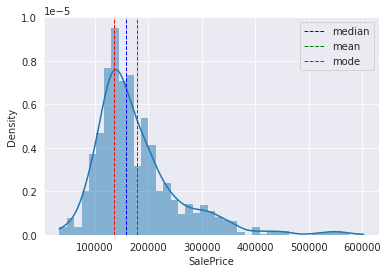

In [ ]:
plot_target_variable_distribution(submission_df, 'SalePrice')

Skewness: 0.10
Kurtosis: 1.00
Mean:     12.01
Median:   11.97
Mode:     11.82


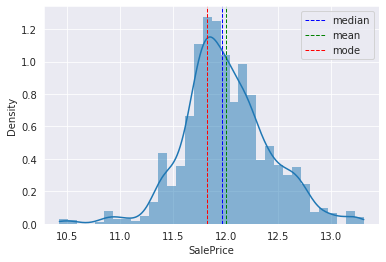

In [ ]:
plot_target_variable_distribution(submission_df, 'SalePrice', log=True)

## Fix outleir predictions

In [ ]:
# Fix outleir predictions
q1 = submission_df['SalePrice'].quantile(0.0045)
q2 = submission_df['SalePrice'].quantile(0.99)
submission_df['SalePrice'] = submission_df['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission_df['SalePrice'] = submission_df['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

## Create CSV file

Skewness: 1.75
Kurtosis: 4.47
Mean:     178,622.43
Median:   157,810.0
Mode:     136,578.0


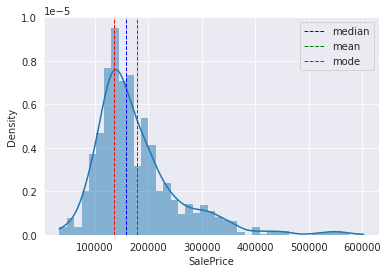

In [ ]:
plot_target_variable_distribution(submission_df, 'SalePrice')

Skewness: 0.10
Kurtosis: 1.00
Mean:     12.01
Median:   11.97
Mode:     11.82


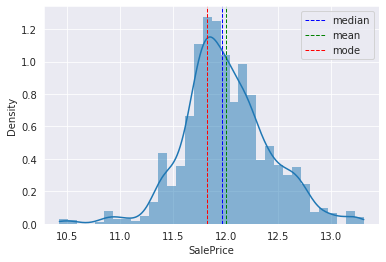

In [ ]:
plot_target_variable_distribution(submission_df, 'SalePrice', log=True)

In [ ]:
#submission_df.to_csv('/content/drive/MyDrive/Colab Notebooks/KaggleChallenges/House_Prices/submission/submission_regression1.csv', index=False)

## 0.11656 submission score 